In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

In [2]:
data=load_breast_cancer()

In [3]:
data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [4]:
X=data.data
Y=data.target

In [16]:
pca=PCA(n_components=2)
pca=pca.fit(X)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [5]:
X_dr=pca.transform(X)
X_dr

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

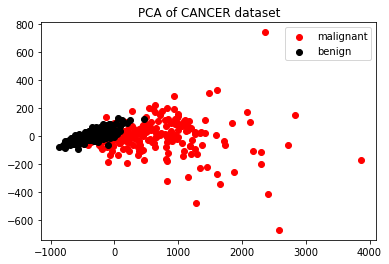

In [6]:
plt.figure()
plt.scatter(X_dr[Y==0, 0], X_dr[Y==0, 1], c="red", label=data.target_names[0])
plt.scatter(X_dr[Y==1, 0], X_dr[Y==1, 1], c="black", label=data.target_names[1])
plt.legend()
plt.title('PCA of CANCER dataset')
plt.show()

In [7]:
#属性explained_variance，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）
pca.explained_variance_

array([443782.6051466 ,   7310.10006165])

In [8]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [9]:
print(sum(pca.explained_variance_ratio_))

0.9982211613741718


In [11]:
import numpy as np
pca_line=PCA().fit(X)
pca_line.explained_variance_ratio_

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

In [12]:
def test1():
    L = []
    for i in range(1,31):
        L = L + [i]
    return L
a=test1()
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


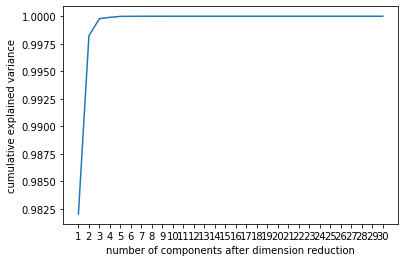

In [13]:
plt.plot(a,np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks(a) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance")
plt.show()
#从累积可解释方差贡献率曲线可知，特征降至三维即可

In [14]:
#最大似然估计自选超参数
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(X)
X_mle = pca_mle.transform(X)
X_mle
#自动6维

array([[ 1.16014257e+03, -2.93917544e+02,  4.85783976e+01, ...,
        -1.98175001e-03,  1.29334919e-03,  1.98910417e-03],
       [ 1.26912244e+03,  1.56301818e+01, -3.53945342e+01, ...,
        -8.33646201e-05, -1.34685217e-03,  6.85925212e-04],
       [ 9.95793889e+02,  3.91567432e+01, -1.70975298e+00, ...,
         1.77646614e-04,  1.84867758e-05, -7.75218581e-04],
       ...,
       [ 3.14501756e+02,  4.75535252e+01, -1.04424072e+01, ...,
        -1.32523400e-03,  2.54369638e-05,  4.83858890e-04],
       [ 1.12485812e+03,  3.41292250e+01, -1.97420874e+01, ...,
         2.69786259e-03,  1.23547951e-03, -8.08728730e-04],
       [-7.71527622e+02, -8.86431064e+01,  2.38890319e+01, ...,
         1.12887112e-03, -4.44552928e-03,  2.42876427e-04]])

In [15]:
pca_f = PCA(n_components=0.99,svd_solver="full")
pca_f = pca_f.fit(X)
X_f = pca_f.transform(X)
pca_f.explained_variance_ratio_
#0.99 二维

array([0.98204467, 0.01617649])